In [134]:
# import libraries
import imp
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)



In [135]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [136]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [137]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [138]:
data.shape

(200, 5)

In [139]:
data.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


All features and Target are float values and There is no Nan or missing values in dataset

In [140]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [141]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

There is an additional column called Unnamed, lets drop that column in data cleaning process. And as we can see the investment on TV is the most and Radio is the least.

# Data cleaning & EDA 


In [142]:
data.duplicated().sum()

0

In [143]:
data.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [144]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [145]:
data.drop('Unnamed: 0', axis =1, inplace = True)

In [146]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

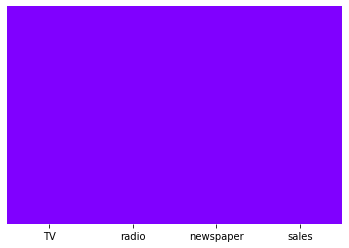

In [147]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow' )

In [148]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

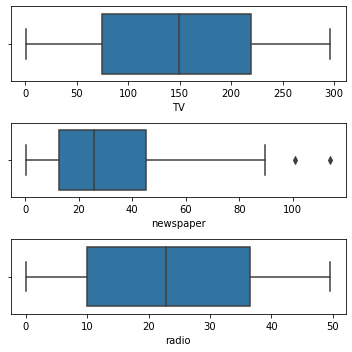

In [149]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt_tv = sns.boxplot(data['TV'], ax = axs[0])
plt_newspaper = sns.boxplot(data['newspaper'], ax = axs[1])
plt_radio = sns.boxplot(data['radio'], ax = axs[2])
plt.tight_layout()

There is no considerable outliers present in the data

<AxesSubplot:xlabel='TV', ylabel='Density'>

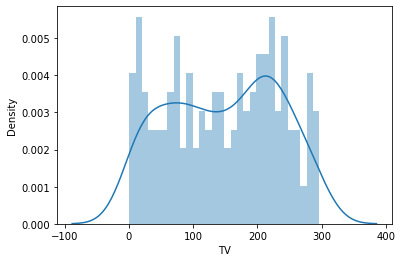

In [150]:
sns.distplot(data["TV"], bins=30)


The data is Bimodal

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

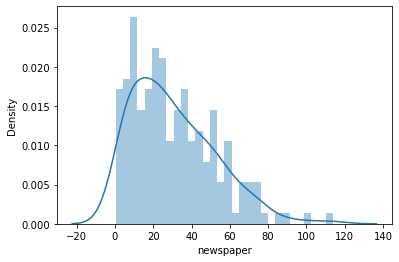

In [151]:
sns.distplot(data["newspaper"], bins = 30)

The data is not distributed normally, hence skewed

<AxesSubplot:xlabel='radio', ylabel='Density'>

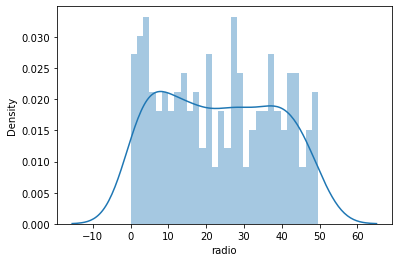

In [152]:
sns.distplot(data["radio"], bins = 30)

The data is Bimodal

<AxesSubplot:xlabel='sales', ylabel='Density'>

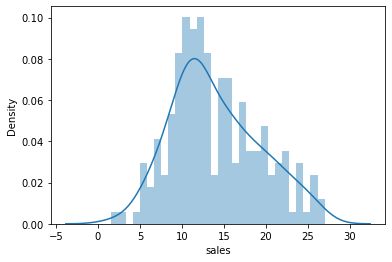

In [153]:
sns.distplot(data["sales"], bins = 30)

Data is positively skewed

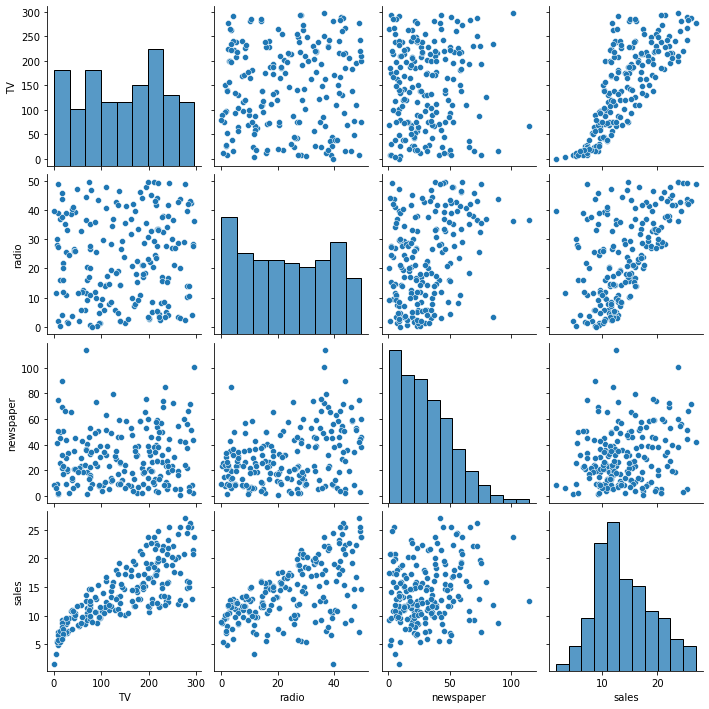

In [154]:
sns.pairplot(data)

# Exploratory Data Analysis


Sales(Target)

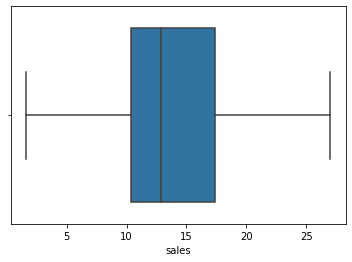

In [155]:
sns.boxplot(data['sales'])
plt.show()

There is no outlier present in the sales data, and the avg sales is between $12000-13000

Features

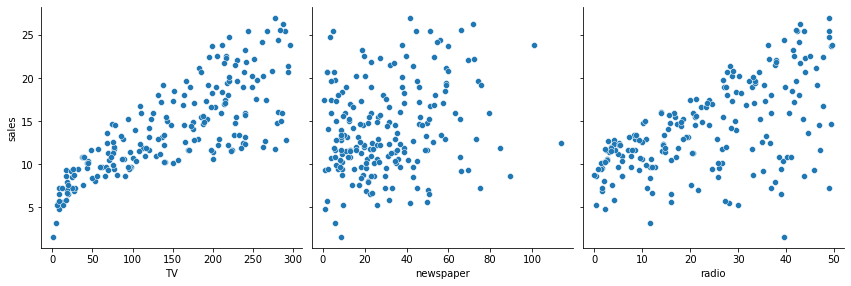

In [156]:
# Seeing how sales are related to other variables using scatter plot.
sns.pairplot(data, x_vars =['TV', 'newspaper', 'radio'], y_vars ='sales', height=4, aspect=1, kind= 'scatter')
plt.show()

TV data appears more linear compared to the other variables, lets confirm it through correlation

<AxesSubplot:>

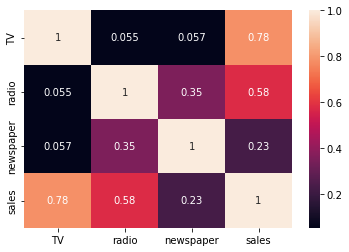

In [157]:
correl= data.corr()
sns.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, annot = True)


As we can see that TV variable is highly correlated with Sales

# Data Preprocessing



In [158]:
data.shape

(200, 4)

In [159]:
# Defining X,Y
training_set = data.iloc[:180,:]
validation_set= data.iloc[180:, :]
print(training_set.shape)
print(validation_set.shape)

(180, 4)
(20, 4)


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

X = training_set[['TV', 'radio', 'newspaper']]
y = training_set['sales'].values.reshape(-1,1)

X_val = validation_set[['TV', 'radio', 'newspaper']]
y_val = validation_set['sales'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [161]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [162]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method ='yeo-johnson')

In [163]:
X.ndim

2

# Baseline model: Multiple linear regression



In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [165]:
print(f"Linear coefficients : {lin_reg.coef_}")
print(f"Intercept : {lin_reg.intercept_}")

Linear coefficients : [[ 0.04612897  0.18931841 -0.00434383]]
Intercept : [2.87968113]


In [166]:
# RSME
lin_reg_pred = lin_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared = False)

print(f'Test RMSE: {test_rmse}')

Test RMSE: 1.2670881035046972


In [167]:
# Validation RMSE

lin_reg_pred_val = lin_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lin_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.5787370393784042


Model Prediction

In [168]:
pred_test_lr = lin_reg.predict(X_test)

Metrices

In [169]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, pred_test_lr)

0.9342855191922568

Multiple linear regression with regularization(Ridge regression)

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_root_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train);

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1e-15}
1.771058987583341


In [171]:
ridge_reg = Ridge(alpha =1e-15)
ridge_reg.fit(X_train, y_train)

ridge_reg_pred = ridge_reg.predict(X_test)

In [172]:
# Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 1.2670881035046964


In [173]:
# Validation RMSE

ridge_reg_pred_val = ridge_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.5787370393784046


In [77]:
### R-squared ###

# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)

In [174]:
pred_test_rr = ridge_reg.predict(X_test)

Multiple linear regression with regularization (lasso)

In [175]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingRegressor

lasso = Lasso(tol=  0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv= 5)
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.1557460907875754


In [176]:
lasso_reg = Lasso(alpha =1)
lasso_reg.fit(X_train, y_train)



Lasso(alpha=1)

In [177]:
# Test RMSE
lasso_reg_pred = lasso_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 1.2533311215864873


In [178]:
# Validation RMSE

lasso_reg_pred_val = lasso_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.5665598587206417


In [179]:
pred_test_lasso = lasso_reg.predict(X_test)

# Tree based models


Random Forest

In [180]:

rf = RandomForestRegressor()

parameters = {'n_estimators':[ int(x) for x in np.linspace(100,1000,10)]}
rf_regressor = GridSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv =5)
rf_regressor.fit(X_train, y_train.ravel())
print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 600}
0.7362399463225856


In [181]:
rf_reg = RandomForestRegressor(n_estimators= 600)
rf_reg.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=600)

In [182]:
# Test RMSE
rf_reg_pred = rf_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.5518975389676031


In [183]:
# Validation RMSE

rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 0.6921765058695558


In [184]:
pred_test_rf_reg = lin_reg.predict(X_test)

In [185]:
y_pred = rf_reg.predict(X_test)

Bagging

In [186]:
bg = BaggingRegressor()


parameters = {'n_estimators':[ int(x) for x in np.linspace(10,1000,10)], 'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)]}
bg_regressor = GridSearchCV(bg, parameters, scoring = 'neg_mean_squared_error', cv =5)
bg_regressor.fit(X_train, y_train.ravel())
print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'max_samples': 0.8, 'n_estimators': 670}
0.7415440936725609


In [187]:
bg_reg =BaggingRegressor(n_estimators = 670, max_samples= 0.8)
bg_reg.fit(X_train, y_train.ravel())

bg_reg_pred = bg_reg.predict(X_test)

# Test RMSE
bg_reg_pred = bg_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.48228074598982834


In [188]:
# Validation RMSE

bg_reg_pred_val = bg_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 0.749408131352966


In [189]:
pred_test_bg = bg_reg.predict(X_test)

# Compile Results

In [190]:
rmse_compilation = {'model': ['linear regression', 'ridge regression', 'lasso', 'random forest', 'bagging'], 'RMSE': [1.5787, 1.5787, 1.5665, 0.6921, 0.7494]}


In [191]:
rmse_df = pd.DataFrame(data =rmse_compilation)
rmse_df.sort_values(by= ['RMSE'], ascending = True)

,model,RMSE
3,random forest,0.6921
4,bagging,0.7494
2,lasso,1.5665
0,linear regression,1.5787
1,ridge regression,1.5787


As we can see Random Forest model is the most accurate comparing to all other models. 

Tuning

In [192]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     579.4
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           6.23e-91
Time:                        13:06:32   Log-Likelihood:                -334.76
No. Observations:                 180   AIC:                             677.5
Df Residuals:                     176   BIC:                             690.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0222      0.117    119.708      0.0

P value

Looking at all coefficients, we have a p-value that is very low for TV and Radio. This means that there is a strong correlation between these coefficients and the target (Sales).

Also we notice that the third coefficient (newspaper) has a large p-value 0.960. Therefore, ad spending on newspaper is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.




In [198]:
X = training_set[['TV', 'radio']]
y = training_set['sales'].values.reshape(-1,1)

X_val = validation_set[['TV', 'radio']]
y_val = validation_set['sales'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [200]:
X_train.shape, y_train.shape

((144, 2), (144, 1))

In [201]:
X_test.shape, y_test.shape

((36, 2), (36, 1))

In [ ]:
y_pred, y_test

In [203]:

rf = RandomForestRegressor()

parameters = {'n_estimators':[ int(x) for x in np.linspace(100,1000,10)]}
rf_regressor = GridSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv =5)
rf_regressor.fit(X_train, y_train.ravel())
print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 1000}
0.7940663290492541


In [204]:
rf_reg = RandomForestRegressor(n_estimators= 1000)
rf_reg.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=1000)

In [205]:
# Test RMSE
rf_reg_pred = rf_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.9557646604216951


In [206]:
# Validation RMSE

rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared =False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 0.7747166820844454
